In [1]:
import pandas as pd

data = pd.read_json('processtimes.json')
data = data.drop(columns=['StationGroup', "UnitIdType"])

data = data.rename(columns={'SerialNumber': 'ItemNumber', 'Value': 'ProcessTime'})
data

,StationName,ItemNumber,ProcessTime,TimeStamp
0,StationName6,10,0.202,2024-10-23 17:19:37.111000+02:00
1,StationName1,1,0.181,2024-10-23 17:19:37.079000+02:00
2,StationName1,14,0.130,2024-10-23 17:19:37.079000+02:00
3,StationName6,20,0.540,2024-10-23 17:19:37.111000+02:00
4,StationName9,27,0.110,2024-10-23 17:19:37.637000+02:00
...,...,...,...,...
114397,StationName144,26410,15.409,2024-10-23 18:22:16.624000+02:00
114398,StationName85,26207,2.188,2024-10-23 18:22:29.926000+02:00
114399,StationName40,26072,0.084,2024-10-23 18:22:32.147000+02:00
114400,StationName42,26122,0.084,2024-10-23 18:22:32.172000+02:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Parameters
x_values = 10  # Number of recent values to check for a trend
slope_threshold = 0.5  # Minimum slope that triggers a warning

# Function to check for increasing trend
def check_increasing_trend(machine_data, x_values, slope_threshold):
    if len(machine_data) < x_values:
        return False  # Not enough data points
    
    # Select the last x values
    recent_times = machine_data[-x_values:].reset_index(drop=True)
    
    # Prepare data for linear regression
    X = np.arange(x_values).reshape(-1, 1)  # Time points as 0, 1, 2, ..., (x_values-1)
    y = recent_times['ProcessTime'].values
    
    # Fit linear regression
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]
    
    # Check if slope exceeds threshold
    return slope > slope_threshold

# Apply the trend check for each machine
warnings = {}
for machine in data['StationName'].unique():
    machine_data = data[data['StationName'] == machine].tail(x_values)
    warnings[machine] = check_increasing_trend(machine_data, x_values, slope_threshold)

print("Warnings per Machine:")
print(warnings)


Warnings per Machine:
{'StationName6': False, 'StationName1': False, 'StationName9': False, 'StationName7': False, 'StationName12': False, 'StationName8': False, 'StationName15': False, 'StationName17': False, 'StationName16': False, 'StationName19': False, 'StationName20': False, 'StationName18': False, 'StationName23': False, 'StationName3': True, 'StationName25': False, 'StationName28': False, 'StationName29': False, 'StationName30': False, 'StationName21': False, 'StationName35': False, 'StationName38': False, 'StationName14': False, 'StationName41': False, 'StationName40': False, 'StationName42': False, 'StationName43': False, 'StationName45': False, 'StationName44': False, 'StationName10': False, 'StationName46': False, 'StationName5': False, 'StationName24': False, 'StationName26': False, 'StationName27': False, 'StationName32': False, 'StationName48': False, 'StationName33': False, 'StationName50': False, 'StationName54': False, 'StationName57': False, 'StationName59': False, '

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Parameters
window_size = 60  # Adjust the window size as needed
slope_threshold = 0.5  # Define the minimum slope that triggers a warning

# Dictionary to store sliding windows for each station
station_windows = {}
warning_count = 0  # Initialize the warning count

# Function to detect trend for each new data point
def detect_trend(station, process_time):
    global warning_count  # Declare warning_count as global

    # Initialize the sliding window for new stations
    if station not in station_windows:
        station_windows[station] = []

    # Add the new process time to the station's sliding window
    station_windows[station].append(process_time)

    # Maintain the window size by removing the oldest entry if necessary
    if len(station_windows[station]) > window_size:
        station_windows[station].pop(0)

    # Only proceed if we have a full window of data points
    if len(station_windows[station]) == window_size:
        # Prepare the data for linear regression
        window_data = np.array(station_windows[station]).reshape(-1, 1)
        window_indices = np.arange(window_size).reshape(-1, 1)

        # Perform linear regression
        model = LinearRegression()
        model.fit(window_indices, window_data)
        slope = model.coef_[0][0]

        # Check if the trend (slope) exceeds the threshold
        if slope > slope_threshold:
            print(f"Warning: Gradual increase detected at {station} "
                  f"(Current process time: {process_time:.2f}, Slope: {slope:.2f})")
            warning_count += 1  # Increment the global warning count
    

ml_data = data[data["StationName"] == 'StationName33']

# Simulate processing each row in real-time
for i in range(len(ml_data)):
    station = ml_data['StationName'].iloc[i]
    process_time = ml_data['ProcessTime'].iloc[i]
    detect_trend(station, process_time)

print(f"Total warnings triggered: {warning_count}")  # Print the final warning count

ml_data


Total warnings triggered: 0


,StationName,ItemNumber,ProcessTime,TimeStamp
93,StationName33,144,2.098,2024-10-23 17:19:40.045000+02:00
100,StationName33,84,2.098,2024-10-23 17:19:40.045000+02:00
195,StationName33,208,2.089,2024-10-23 17:19:44.407000+02:00
206,StationName33,206,2.090,2024-10-23 17:19:44.407000+02:00
338,StationName33,310,2.079,2024-10-23 17:19:48.605000+02:00
...,...,...,...,...
114056,StationName33,26431,1.816,2024-10-23 18:22:15.691000+02:00
114218,StationName33,26458,1.826,2024-10-23 18:22:21.951000+02:00
114220,StationName33,26459,1.826,2024-10-23 18:22:21.951000+02:00
114359,StationName33,26494,1.832,2024-10-23 18:22:27.739000+02:00


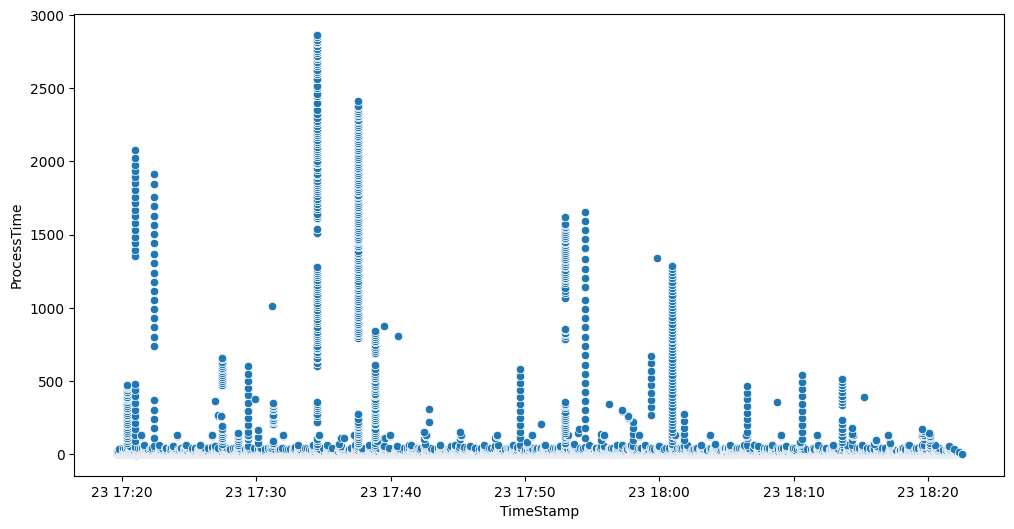

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


plotdata = data[data["StationName"] == 'StationName2']
# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='TimeStamp', y='ProcessTime')
plt.show()